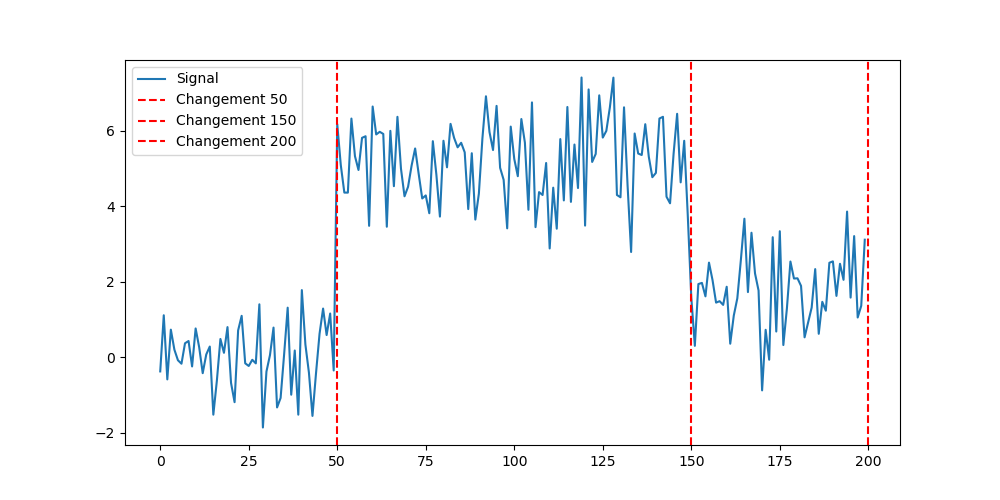

In [26]:
#pip install ruptures
%matplotlib widget 

import numpy as np
import ruptures as rpt
import matplotlib.pyplot as plt

# Génération d'un signal avec rupture
n_samples = 200
n_bkps = 2  # Nombre de points de rupture
signal = np.concatenate([
    np.random.normal(0, 1, 50),
    np.random.normal(5, 1, 100),
    np.random.normal(2, 1, 50)
])

# Détection des points de rupture
algo = rpt.Binseg(model="l2").fit(signal)
bkps = algo.predict(n_bkps)

# Affichage du signal et des points de rupture
plt.figure(figsize=(10, 5))
plt.plot(signal, label="Signal")
for bkp in bkps:
    plt.axvline(bkp, color="red", linestyle="--", label=f"Changement {bkp}")
plt.legend()
plt.show()

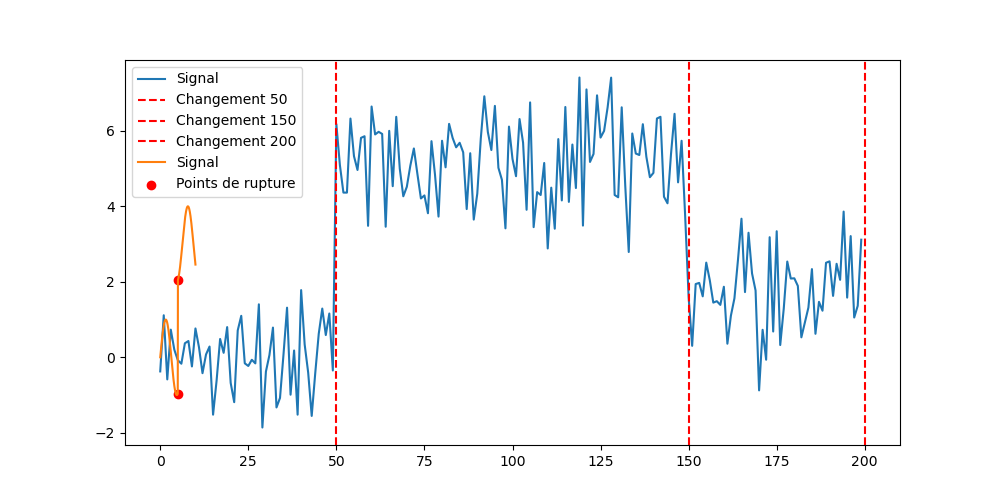

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Signal fictif avec rupture
x = np.linspace(0, 10, 200)
y = np.piecewise(x, [x < 5, x >= 5], [lambda x: np.sin(x), lambda x: np.sin(x) + 3])

# Calcul de la dérivée
dy = np.gradient(y)
threshold = 1  # Seuil à ajuster
rupture_points = np.where(np.abs(dy) > threshold)[0]
# Affichage
plt.plot(x, y, label="Signal")
plt.scatter(x[rupture_points], y[rupture_points], color='red', label="Points de rupture")
plt.legend()
plt.show()

In [28]:
ncep_data = np.array([209.32126416, 209.54005496, 212.67764742, 210.37478177,
       205.34534194,          np.nan, 211.71492671, 210.61693365,
       207.38245122, 210.53782018, 209.27921978, 206.76416638,
       204.77899059, 208.57833257, 209.19305243, 211.29124945,
       210.97758001, 211.20985929, 208.13878918, 210.04528568,
       209.02062141, 213.16464545, 206.73429404, 205.44506642,
       204.47953136,          np.nan, 212.30588069, 212.43316318,
       206.60329714, 203.21395555, 209.48958028, 207.15021242,
       208.72757145, 210.53914098, 209.55238904, 208.73429342,
       209.41816544, 210.41366686, 209.88212795, 209.49512005,
       212.82436908, 210.08647104, 214.72804103, 209.74572808,
       207.41525719, 209.83143822, 208.88060105, 205.27689962,
       205.02942659, 213.09643871, 210.02968537, 204.802012  ,
       199.42365128, 205.95233423, 212.40639014, 206.69321342,
       211.31855209, 210.21401739, 206.56351783, 204.66989714,
       209.33283613, 209.30221985, 206.56607193, 211.19325037,
       207.52564064, 209.66653668, 205.06520722, 207.40331607,
       210.01885186, 204.1538804 , 215.16502856, 209.36488674,
       210.66862347, 210.66722322, 212.13785126, 205.44361635,
       209.44378063, 211.6382426 , 207.98100788, 210.74008374,
       212.14761329, 209.86243517, 209.57073867, 208.58195901,
       207.58093029, 207.85194497, 210.42461363, 210.04262202,
       208.4320476 , 210.60828307, 213.9587507 , 203.64975296,
       210.06959192, 209.86352637, 209.81255734, 211.21015191,
       202.69208442, 212.08584205, 214.67952574, 211.3011308 ,
       205.39145895, 208.8350647 , 204.85349867, 203.74017752,
       209.44119732, 208.0032953 , 203.35167887, 214.82136869,
       208.67037561, 211.71008253, 209.82780517, 209.85728437,
       206.13177738, 208.16754483, 206.5145989 , 211.76200426,
       209.73933254, 207.56627256, 208.328547  , 207.54930518,
       211.99237096, 207.37511996, 209.02241835, 205.5818315 ,
       207.06830011, 208.22886688, 208.91558661, 203.88282138,
       211.52435065, 208.73601934, 209.84212606, 209.4794706 ,
       204.01564582, 207.40378804, 203.99676722, 203.78576955,
       209.95500985, 207.01455186, 211.96706172, 202.47060892,
       199.46070377, 203.1831246 , 209.93677989, 209.83301905,
       208.28655783, 211.57412167, 211.11427264, 208.25064964,
       209.16411886, 211.12440017, 208.80836971, 209.82659514,
       209.00494182, 207.72123877, 210.33778402, 209.30258502,
       206.12315157, 207.42329436, 207.26711815, 209.95320403,
       206.69271403, 208.70980099, 206.182155  , 212.66455518,
       209.53565189, 206.86708209, 202.7809254 , 207.54338868,
       216.19712871, 210.81180134, 208.88366338, 207.56302981,
       207.97862036, 208.85396706, 204.79988564, 205.37336695,
       208.47700814, 213.00326172, 211.51749394, 212.51343697,
       207.21681925, 204.78907984, 212.72979991, 208.6391282 ,
       207.51852379, 210.75087161, 212.39026744, 209.64296945,
       210.69975811, 209.3100236 , 211.02577868, 201.49603765,
       210.53786913, 210.74986987, 204.85501477, 210.68358505,
       206.94469093, 208.72520812, 212.12468466, 210.89358403,
       209.42333994, 210.12542858, 211.32659244, 211.7694234 ,
       210.97917548, 209.13091532, 206.28594622, 207.839235  ,
       204.44029501, 206.99541202, 208.34338659, 210.63423051,
       207.20346626, 205.70638234, 210.08429392])

argo_data = np.array([200.75802612, 199.9480896 , 198.24954224, 197.94885254,
       191.51383972, 197.0801239 , 196.74275208, 194.94476318,
       192.3890686 , 193.53671265, 196.80036926, 194.78970337,
       191.77700806, 194.43185425, 194.36094666, 196.29544067,
       198.03686523, 197.75476074, 194.55667114, 195.90066528,
       194.71542358, 200.2256012 , 191.8192749 , 190.13583374,
       189.65141296, 190.68029785, 194.37564087, 196.90762329,
       191.51034546, 188.00448608, 192.86134338, 190.81170654,
       191.47460938, 195.47943115, 193.20526123, 196.23745728,
       195.34086609, 194.62944031, 195.84965515, 197.36373901,
       202.22554016, 197.94125366, 203.54162598, 198.5105896 ,
       196.44503784, 198.26480103, 194.99989319, 189.98126221,
       189.82766724, 196.97369385, 194.47332764, 190.26065063,
       184.74206543, 191.0262146 , 198.64028931, 190.17950439,
       193.59216309, 194.9732666 , 189.10766602, 187.4085083 ,
       194.52185059, 193.03265381, 189.43429565, 192.14942932,
       192.84573364, 193.7171936 , 188.56190491, 191.57344055,
       191.9602356 , 187.93873596, 196.41275024, 190.59158325,
       195.90765381, 196.88348389, 198.40167236, 192.13717651,
       195.72468567, 198.56608582, 196.73390198, 199.42098999,
       196.6411438 , 193.28912354, 195.96678162, 194.92004395,
       193.53738403, 193.91311646, 195.22367859, 194.82250977,
       194.92849731, 192.52593994, 198.30151367, 187.65118408,
       191.4289856 , 191.22528076, 191.55236816, 194.69036865,
       187.63577271, 194.78735352, 196.57836914, 193.06060791,
       189.58677673, 190.11541748, 188.4465332 , 185.13070679,
       191.85858154, 188.32250977, 188.56231689, 196.95602417,
       193.71286011, 193.97727966, 193.41252136, 194.83532715,
       191.48498535, 192.21852112, 191.96820068, 197.42971802,
       194.84188843, 192.980896  , 193.34736633, 192.40971375,
       198.01095581, 191.95980835, 191.33059692, 189.75764465,
       188.934021  , 192.79902649, 190.48550415, 188.10604858,
       193.53121948, 191.45959473, 190.96318054, 191.59228516,
       186.97717285, 188.3664856 , 186.7063446 , 188.5831604 ,
       190.92272949, 187.40751648, 192.02345276, 184.47058105,
       183.30992126, 186.63476562, 189.96694946, 191.16177368,
       188.44500732, 192.66967773, 195.41275024, 194.47134399,
       194.10836792, 197.18647766, 194.70574951, 195.31756592,
       193.40185547, 191.03082275, 193.17579651, 195.53726196,
       191.61853027, 192.10452271, 190.91571045, 194.42199707,
       190.3046875 , 190.9992218 , 189.67453003, 193.98765564,
       192.86665344, 188.34436035, 187.02828979, 188.23796082,
       199.07229614, 193.12005615, 192.37692261, 188.45532227,
       187.51528931, 188.67945862, 185.27780151, 185.92938232,
       187.3059082 , 194.78649902, 196.04795837, 194.33518982,
       189.91079712, 187.08154297, 194.90499878, 191.44787598,
       190.80761719, 192.06648254, 195.04797363, 193.18557739,
       192.28503418, 191.39601135, 194.2613678 , 186.12710571,
       193.12643433, 192.4962616 , 186.71191406, 192.98120117,
       188.85446167, 186.90533447, 191.94714355, 193.13735962,
       192.15591431, 189.68701172, 191.69718933, 191.35980225,
       193.77839661, 192.30453491, 191.23947144, 191.21951294,
       188.28173828, 190.45845032, 190.06867981, 193.47840881,
       193.06924438, 187.08865356, 192.76690674])
delta_T = np.array([  11.42      ,   31.29668981,   51.41674769,   71.42152778,
         91.41222222,  111.43925926,  131.4172338 ,  151.40842593,
        171.4069213 ,  191.39893519,  211.40471065,  231.4052662 ,
        251.40890046,  271.40328704,  291.40824074,  311.40733796,
        331.40922454,  351.40813657,  371.40511574,  391.40517361,
        411.40761574,  431.41083333,  451.40625   ,  471.40518519,
        491.4022338 ,  511.40541667,  531.40983796,  551.41018519,
        561.41116898,  571.41041667,  581.40788194,  591.40540509,
        601.41260417,  611.40462963,  621.40935185,  631.40740741,
        641.40725694,  651.41081019,  661.41064815,  671.40940972,
        681.40305556,  691.4080787 ,  701.4094213 ,  711.40334491,
        721.40944444,  731.4094213 ,  741.40511574,  751.40497685,
        761.41068287,  771.41123843,  781.40768519,  791.40702546,
        801.41273148,  811.40929398,  821.40763889,  831.42201389,
        841.41515046,  851.42836806,  861.42273148,  871.42207176,
        881.41583333,  891.4184375 ,  901.41903935,  911.42109954,
        921.42017361,  931.41954861,  941.41880787,  951.42      ,
        961.42155093,  971.42688657,  981.41060185,  991.40928241,
       1001.42042824, 1011.41883102, 1021.41233796, 1031.40856481,
       1041.40627315, 1051.40501157, 1061.41258102, 1071.40940972,
       1081.40943287, 1091.4275    , 1101.40866898, 1111.40696759,
       1121.40894676, 1131.40719907, 1141.40586806, 1151.40679398,
       1161.42016204, 1171.41850694, 1181.41993056, 1191.42278935,
       1201.4133912 , 1211.42430556, 1221.42502315, 1231.42729167,
       1241.42313657, 1251.41505787, 1261.42204861, 1271.41621528,
       1281.42034722, 1291.42059028, 1301.40454861, 1311.4059375 ,
       1321.40399306, 1331.41755787, 1341.40168981, 1351.4134375 ,
       1361.41108796, 1371.41945602, 1381.40909722, 1391.41101852,
       1401.40796296, 1411.41081019, 1421.40662037, 1431.40527778,
       1441.41298611, 1451.40695602, 1461.41329861, 1471.4084375 ,
       1481.4047338 , 1491.40736111, 1501.40644676, 1511.40555556,
       1521.40515046, 1531.40907407, 1541.4065625 , 1551.40833333,
       1561.40822917, 1571.41230324, 1581.41167824, 1591.4091088 ,
       1601.41103009, 1611.40833333, 1621.40751157, 1631.41238426,
       1641.41388889, 1651.4097338 , 1661.41108796, 1671.40866898,
       1681.41123843, 1691.41146991, 1701.41042824, 1711.40633102,
       1721.41034722, 1731.40935185, 1741.41243056, 1751.41049769,
       1761.41131944, 1771.40710648, 1781.40828704, 1791.40751157,
       1801.40954861, 1811.41008102, 1821.40931713, 1831.40892361,
       1841.408125  , 1851.40689815, 1861.40907407, 1871.4077662 ,
       1881.40763889, 1891.40568287, 1901.40957176, 1911.40568287,
       1921.40614583, 1931.40789352, 1941.4080787 , 1951.4109375 ,
       1961.40359954, 1971.41020833, 1981.40540509, 1991.40811343,
       2001.4112963 , 2011.41172454, 2021.41010417, 2031.40872685,
       2041.40847222, 2051.41188657, 2061.4112963 , 2071.40771991,
       2081.40869213, 2091.40734954, 2101.40929398, 2111.41011574,
       2121.40929398, 2131.40924769, 2141.40975694, 2151.41065972,
       2170.99143519, 2190.57615741, 2210.15677083, 2229.74565972,
       2249.32331019, 2268.90822917, 2288.4959375 , 2308.07605324,
       2327.65446759, 2347.24581019, 2366.825625  , 2386.40980324,
       2405.99914352, 2425.57706019, 2445.15677083, 2464.74331019,
       2484.33015046, 2503.90925926, 2523.49547454, 2543.07571759,
       2562.65931713, 2582.24596065, 2601.83042824, 2621.41077546,
       2640.99789352, 2660.58613426, 2680.16547454])

In [82]:
isok = np.isfinite(ncep_data)
ncep_data_ok=ncep_data[isok]
argo_data_ok = argo_data[isok]
delta_T_ok = delta_T[isok]
val_bid =ncep_data_ok/argo_data_ok

[]


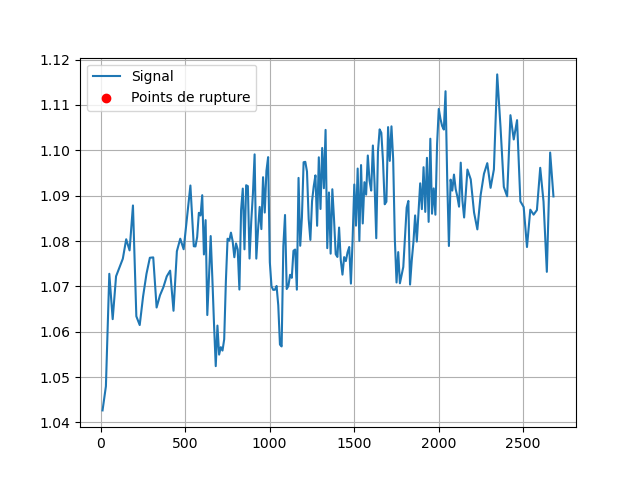

In [83]:
plt.figure()
dy = np.gradient(val_bid)
threshold = 1  # Seuil à ajuster
rupture_points = np.where(np.abs(dy) > threshold)[0]
print(rupture_points)
# Affichage
plt.plot(delta_T_ok,val_bid, label="Signal")
plt.scatter(delta_T_ok[rupture_points], val_bid[rupture_points], color='red', label="Points de rupture")
plt.grid()
plt.legend()
plt.show()

1
[2680.16547454]


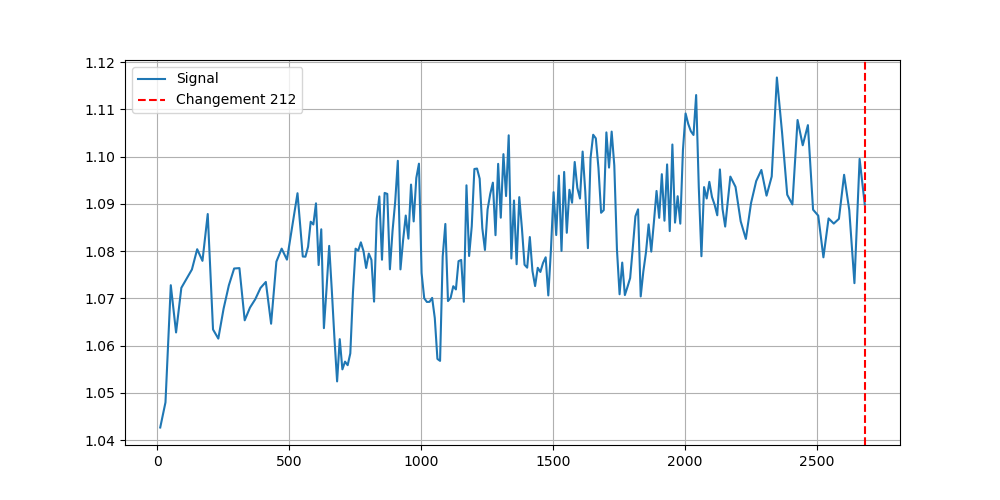

In [91]:
# Génération d'un signal avec rupture
n_bkps = 0  # Nombre de points de rupture


# Détection des points de rupture
algo = rpt.Binseg(model="l2").fit(val_bid)
bkps = algo.predict(n_bkps)
bkps = np.array(bkps)-1
print(len(bkps))
print(delta_T_ok[bkps])
# Affichage du signal et des points de rupture
plt.figure(figsize=(10, 5))
plt.plot(delta_T_ok,val_bid, label="Signal")
#plt.plot(val_bid, label="Signal")

for bkp in bkps:
    plt.axvline(delta_T_ok[bkp], color="red", linestyle="--", label=f"Changement {bkp}")
plt.legend()
plt.grid()
plt.show()

Les ruptures sont associées aux temps suivants: [ 641.40725694  741.40511574  991.40928241 1141.40586806 1391.41101852
 1491.40736111 1741.41243056 1791.40751157 1991.40811343 2041.40847222
 2680.16547454]


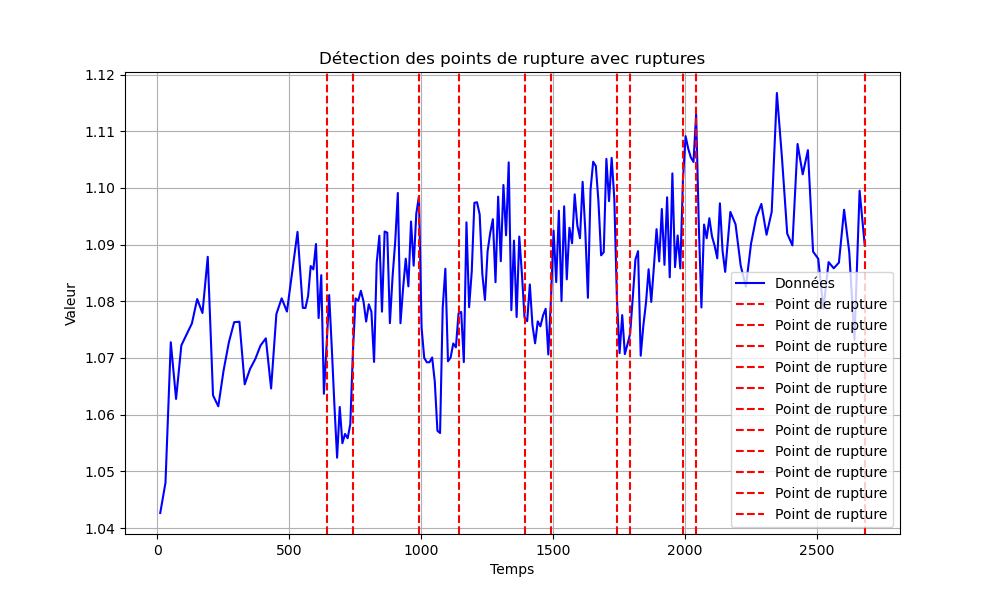

In [116]:
model = "l2"  # modèle de rupture (par exemple "l2" pour les ruptures sur la moyenne)
#model = "l1"
model="rbf"
algo = rpt.Pelt(model=model).fit(val_bid)
result = algo.predict(pen=2)  # Ajuster "pen" pour la sensibilité
result = np.array(result)-1
# Affichage des points de rupture
#print(f"Les ruptures détectées se produisent aux indices: {result}")

# Trouver le temps associé à chaque rupture
times_of_cut = delta_T_ok[result]
print(f"Les ruptures sont associées aux temps suivants: {times_of_cut}")

# Visualisation des données avec les ruptures détectées
plt.figure(figsize=(10, 6))
plt.plot(delta_T_ok, val_bid, label="Données", color="blue")
for cut in times_of_cut:
    plt.axvline(x=cut, color='red', linestyle='--', label="Point de rupture")
plt.title("Détection des points de rupture avec ruptures")
plt.xlabel("Temps")
plt.ylabel("Valeur")
plt.legend(draggable=True)
plt.grid()
plt.show()

In [107]:
algo=rpt.detection.pelt.Pelt(model="rbf").fit(val_bid)
algo.predict(pen=10)

[90, 213]

In [61]:
toto=np.array(result)-1
toto

array([  9,  14,  19,  24,  29,  34,  39,  44,  49,  54,  59,  64,  69,
        74,  79,  84,  89,  94,  99, 104, 109, 114, 119, 124, 129, 134,
       139, 144, 149, 154, 159, 164, 169, 174, 179, 184, 189, 194, 199,
       204, 209, 214])